In [24]:
# Downloads: 
#!pip install matplotlib
#!pip install opencv-python
#!pip install pandas
#!pip install scikit-learn
#!pip install tensorflow 

In [1]:
import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# import numpy as np
from glob import glob
import cv2

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

2023-10-05 12:45:06.629727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 12:45:06.680327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 12:45:06.680344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 12:45:06.680363: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 12:45:06.689924: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 12:45:06.690637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Consultando diretorio:
os.getcwd()

'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est'

In [3]:
# train_img = sorted(list(os.listdir(os.path.join(imgs_dir, 'train'))))
imgs_dir="/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens"

train_images = sorted(glob(os.path.join(imgs_dir, "*/*.png")))
print(len(train_images))
train_images[-5]

2298


'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_SEK/PAT_93_361_231.png'

In [4]:
train_images[0:5]

['/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1006_53_385.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1006_53_716.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1013_82_876.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1014_85_22.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1014_86_861.png']

In [5]:
# Desses dados de treino, vamos separar um tanto para teste (15% de cada classe)
ACK = [i for i in train_images if "source_ACK" in i]
BCC	= [i for i in train_images if "source_BCC" in i]
MEL	= [i for i in train_images if "source_MEL" in i]
NEV = [i for i in train_images if "source_NEV" in i]
SCC = [i for i in train_images if "source_SCC" in i]
SEK	= [i for i in train_images if "source_SEK" in i]

In [8]:
# Coletando sample de 15% em cada uma delas: 
import random 

def get_15(ls: list):

    sz = len(ls)
    fiv = int((sz*15)/100)

    return random.sample(ls, fiv)

ACK_sample = get_15(ACK)
BCC_sample = get_15(BCC)
MEL_sample = get_15(MEL)
NEV_sample = get_15(NEV)
SCC_sample = get_15(SCC)
SEK_sample = get_15(SEK)

In [133]:
len(ACK_sample) + len(BCC_sample) + len(MEL_sample) + len(NEV_sample) + len(SCC_sample) + len(SEK_sample)

341

In [41]:
# Salvar essas imagens dentro de suas respecitvas pastas com nome de Validation_data:
import shutil
    

def move_validation(ls, class_name):

    aug_path = "/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/validation_images"

    if not os.path.exists(os.path.join(aug_path, class_name)):
        os.makedirs(os.path.join(aug_path, class_name))

    for iten in ls:
        caminho_origem = iten
        nome_arquivo = iten.rfind("/") + 1
        nome_arquivo = iten[nome_arquivo::]
        caminho_destino = os.path.join(aug_path, class_name) + "/" + nome_arquivo
        # Movendo o arquivo:
        shutil.move(caminho_origem, caminho_destino)

In [48]:
move_validation(ls = SEK_sample, class_name = "source_SEK")

#### 1. Nesse momento ja temos uma pasta com dados de validacao e uma de dados originais! 
#### 2. Agora vamos confirmar que os originais estao diminuidos e depois gerar um data augmentation com esses originais.
#### 3. Depois disso vamos treinar o modelo com esse data ugmentation e depois fazer um teste com os dados de validacao!

In [49]:
# train_img = sorted(list(os.listdir(os.path.join(imgs_dir, 'train'))))
imgs_dir="/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens"

train_images = sorted(glob(os.path.join(imgs_dir, "*/*.png")))
print(len(train_images))
train_images[-5]

1957


'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_SEK/PAT_893_1697_613.png'

In [50]:
# Desses dados de treino, vamos separar um tanto para teste (15% de cada classe)
ACK = [i for i in train_images if "source_ACK" in i]
BCC	= [i for i in train_images if "source_BCC" in i]
MEL	= [i for i in train_images if "source_MEL" in i]
NEV = [i for i in train_images if "source_NEV" in i]
SCC = [i for i in train_images if "source_SCC" in i]
SEK	= [i for i in train_images if "source_SEK" in i]

In [54]:
print("PARTE 01:")
print(len(MEL))
print(52-7)

PARTE 01:
45
45


In [55]:
### Parte 02:

In [56]:
# Criando as labels para as imagens: 
dados_labels = []
for file in train_images:
    if 'source_ACK' in file:
        dados_labels.append("source_ACK")
    elif 'source_BCC' in file:
        dados_labels.append("source_BCC")
    elif 'source_MEL' in file:
        dados_labels.append("source_MEL")
    elif 'source_NEV' in file:
        dados_labels.append("source_NEV")
    elif 'source_SCC' in file:
        dados_labels.append("source_SCC")
    elif 'source_SEK' in file:
        dados_labels.append("source_SEK")
    else:
        print("labels nao identificada: ", file)

In [57]:
dataset = pd.DataFrame({"image_path":train_images, "image_label":dados_labels})
dataset

,image_path,image_label
0,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK
1,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK
2,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK
3,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK
4,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK
...,...,...
1952,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK
1953,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK
1954,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK
1955,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK


In [58]:
dataset_gb = dataset.groupby('image_label').count()
dataset_gb

,image_path
image_label,
source_ACK,621
source_BCC,719
source_MEL,45
source_NEV,208
source_SCC,164
source_SEK,200


In [59]:
datagen = ImageDataGenerator(shear_range=0.15, zoom_range=0.15, rotation_range=20)

folder_path = "/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/"
aug_path = os.path.join(folder_path, 'second_aug_imgs')

# Definning the biggest label as maximo:
to_equalize = 719

for class_name in dataset.image_label.unique():
    # Numero de amostras daquela categoria! 
    sz_label = len(dataset[dataset["image_label"]==class_name])
    # Numero de imagens que eu preciso gerar:
    qtd_preciso_gerar = to_equalize - sz_label

    for qt in range(qtd_preciso_gerar):
        # Pegando aleatoriamente o path de uma imagem dentro do dataset dessa lable:
        f = dataset[dataset["image_label"]==class_name].sample(1)['image_path'].values[0]
        
        # Fazendo load e uma pre-preparacao:
        img = load_img(f)
        x = img_to_array(img)
        # Reshape the input image
        x = x.reshape((1, ) + x.shape)
        
        # Criando o diretorio para colocar as imagens aumentadas:
        if not os.path.exists(os.path.join(aug_path, class_name)):
            os.makedirs(os.path.join(aug_path, class_name))

        # generate 1 new augmented image for that image:
        for batch in datagen.flow(x, batch_size = 1,save_to_dir =os.path.join(aug_path, class_name),save_prefix ='img', save_format ='png'):
            break
            #i += 1
            #if i > 5:
                #break

In [60]:
print("finish")

finish


#### ABRINDO E JUNTANDO OS DATASETS ORIGINAIS E AUMENTADOS

In [61]:
# IMAGENS ORIGINAIS:
# train_img = sorted(list(os.listdir(os.path.join(imgs_dir, 'train'))))
imgs_dir_orig = "/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens"

train_images = sorted(glob(os.path.join(imgs_dir_orig, "*/*.png")))
print(len(train_images))
train_images[0]

1957


'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/imagens/source_ACK/PAT_1013_82_876.png'

In [62]:
# IMAGENS ORIGINAIS:
imgs_dir_aug = "/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs"

data_augmented = sorted(glob(os.path.join(imgs_dir_aug, "*/*.png")))
print(len(data_augmented))
data_augmented[0]

2293


'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1248.png'

In [63]:
data_augmented[0:10]

['/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1248.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1321.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1494.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1506.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1557.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1588.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_1710.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_176.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/second_aug_imgs/source_ACK/img_0_2005.png',
 '/mnt/lustre/home/armando/projeto_prob_est/projeto_prob

In [64]:
# Criando as labels para as imagens: 
dados_labels_orig = []
for file in train_images:
    if 'source_ACK' in file:
        dados_labels_orig.append("source_ACK")
    elif 'source_BCC' in file:
        dados_labels_orig.append("source_BCC")
    elif 'source_MEL' in file:
        dados_labels_orig.append("source_MEL")
    elif 'source_NEV' in file:
        dados_labels_orig.append("source_NEV")
    elif 'source_SCC' in file:
        dados_labels_orig.append("source_SCC")
    elif 'source_SEK' in file:
        dados_labels_orig.append("source_SEK")
    else:
        print("labels nao identificada: ", file)

In [65]:
# Criando as labels para as imagens: 
dados_labels_aug = []
for file in data_augmented:
    if 'source_ACK' in file:
        dados_labels_aug.append("source_ACK")
    elif 'source_BCC' in file:
        dados_labels_aug.append("source_BCC")
    elif 'source_MEL' in file:
        dados_labels_aug.append("source_MEL")
    elif 'source_NEV' in file:
        dados_labels_aug.append("source_NEV")
    elif 'source_SCC' in file:
        dados_labels_aug.append("source_SCC")
    elif 'source_SEK' in file:
        dados_labels_aug.append("source_SEK")
    else:
        print("labels nao identificada: ", file)

In [66]:
dataset_01 = pd.DataFrame({"image_path":train_images, "image_label":dados_labels_orig})
dataset_01['source'] = "original"
dataset_02 = pd.DataFrame({"image_path":data_augmented, "image_label":dados_labels_aug})
dataset_02['source'] = "augmented"

dataset = pd.concat([dataset_01,dataset_02])

dataset.to_csv("dataset_final.csv", index=None)

In [67]:
dataset

,image_path,image_label,source
0,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK,original
1,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK,original
2,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK,original
3,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK,original
4,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_ACK,original
...,...,...,...
2288,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK,augmented
2289,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK,augmented
2290,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK,augmented
2291,/mnt/lustre/home/armando/projeto_prob_est/proj...,source_SEK,augmented


#### TREINANDO O MODELO COM DADOS AUMENTADOS

In [68]:
## Explorando o dataset:
dataset.image_label.value_counts()

image_label
source_ACK    719
source_BCC    719
source_NEV    705
source_SCC    704
source_SEK    703
source_MEL    700
Name: count, dtype: int64

In [69]:
## Criando lista de iamge_paths e lista de labels:
dados_labels = dataset.image_label.tolist()
dados_treino_imagens = dataset.image_path.tolist()

In [70]:
# Lendo as imagens propriamente com o imread:
dados_treino_imagens = [cv2.imread(file) for file in dados_treino_imagens]

In [71]:
# Verificando tamanho dos datasets:
print("Tamanho dataset imagens: ", len(dados_treino_imagens))
print("Tamanho dataset labels: ", len(dados_labels))

Tamanho dataset imagens:  4250
Tamanho dataset labels:  4250


In [72]:
### Redimensionando nossos dados (Nesse caso nao consigui aplicar o PCA, mas num outro caso podemos aplicar esse metodo)
dados_treino_imagens_resized = [cv2.resize(item, (224,224)) for item in dados_treino_imagens]

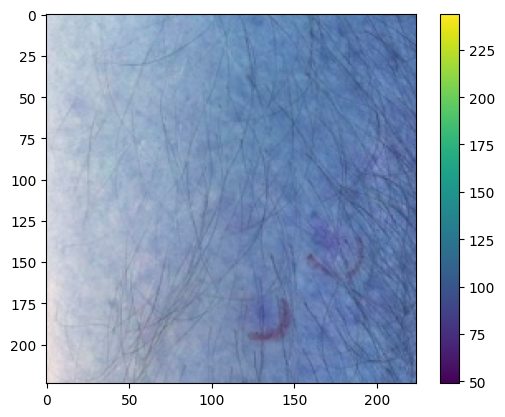

In [73]:
# Observar que elas estao em escala de 0 a 255, isso causa problemas em nosso modelo ja que a diferenca dos pixels sao
# muito grandes desta forma a distribuicao de pesos atribuidas por nosso modelo fica equivocada:

plt.figure()
plt.imshow(dados_treino_imagens_resized[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [74]:
# Colocando as imagens em um Array para que possa normaliza-las em escala 0-1:
import numpy as np
dados_treino_imagens_final = np.array([item for item in dados_treino_imagens_resized])

In [75]:
# Verificando shape de nosso dataset (agora em ARRAY):
dados_treino_imagens_final.shape

(4250, 224, 224, 3)

In [76]:
# Normalizando nossas imagens para escala de 0 - 1:
dados_treino_imagens_final = dados_treino_imagens_final / 255

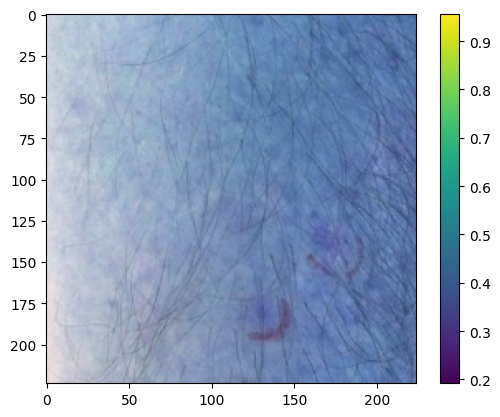

In [77]:
# Observe que nossa escala agora eh de 0 - 1:

plt.figure()
plt.imshow(dados_treino_imagens_final[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [78]:
dados_labels_decode = []

for file in dados_labels:
    if 'source_ACK' in file:
        dados_labels_decode.append(0)
    elif 'source_BCC' in file:
        dados_labels_decode.append(1)
    elif 'source_MEL' in file:
        dados_labels_decode.append(2)
    elif 'source_NEV' in file:
        dados_labels_decode.append(3)
    elif 'source_SCC' in file:
        dados_labels_decode.append(4)
    elif 'source_SEK' in file:
        dados_labels_decode.append(5)
    else:
        print("labels nao identificada: ", file)

In [79]:
### Aplicando Machine Learning:
dados_imagens = dados_treino_imagens_final
dados_labels = np.array(dados_labels_decode)

In [80]:
from sklearn.utils import shuffle
dados_imagens, dados_labels = shuffle(dados_treino_imagens_final, dados_labels, random_state=0)

In [81]:
print("Corpo do nosso dataset de imagens: ", (dados_imagens.shape))
print("Tamanho do dataset de labels: ", len(dados_labels))

Corpo do nosso dataset de imagens:  (4250, 224, 224, 3)
Tamanho do dataset de labels:  4250


In [82]:
from tensorflow import keras

# Bibliotecas para metricas do modelo
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
import statistics
from sklearn.metrics import confusion_matrix
# Setando o numero de folds para nosso Cross-Validation:
from sklearn.model_selection import StratifiedKFold

In [83]:
# Importing all necessary libraries
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
#from tensorflow import keras

def cria_modelo2():
    
    input_shape = (224, 224, 3)

    model = keras.Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
              metrics=['accuracy'])

    return model

In [84]:
### Treinamento com cross-validation:

# Setando o numero de folds para nosso Cross-Validation:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
accuracy = []
precision_met = []
recall_met = []
counter = 0

for indice_treino, indice_teste in skf.split(dados_imagens, dados_labels):
    
    imagens_treino, imagens_teste = dados_imagens[indice_treino], dados_imagens[indice_teste]
    labels_treino, labels_teste = dados_labels[indice_treino], dados_labels[indice_teste]
    
    modelo = cria_modelo2()
    modelo.fit(imagens_treino, labels_treino, epochs=35)
    
    # Verifica valor da Accuracia do modelo:
    _, test_acc = modelo.evaluate(imagens_teste,  labels_teste, verbose=2)
    
    # Realiza predicoes com o modelo para validacao das metricas Precision e Recall:
    predicoes = modelo.predict(imagens_teste)
    predict = []

    for i in range(0,len(imagens_teste)):
        predict.append((np.argmax(predicoes[i])))
        
    # Verifica metrica Precision e Recall do modelo:    
    #precision = precision_score(labels_teste, predict)
    #recall = recall_score(labels_teste,predict)

    # Guarda dados para a Confusion Matrix:
    if (counter == 0):
        matrix_one = confusion_matrix(labels_teste, predict)
        
    elif (counter == 1):
        matrix_two = confusion_matrix(labels_teste, predict)
        
    else:
        matrix_three = confusion_matrix(labels_teste, predict)
    
    
    accuracy.append(test_acc)
    #precision_met.append(precision)
    #recall_met.append(recall)
    
    
    # Incrementa o Counter:
    counter = counter + 1
    
    print('\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                   

In [85]:
print("Foi")

Foi


### MODELO 01

In [86]:
### Acuracia:
print("Accuracia media dos modelo:",  statistics.mean(accuracy))

Accuracia media dos modelo: 0.5401479105154673


In [88]:
accuracy

[0.723359227180481, 0.7282992005348206, 0.16878530383110046]

### Dividindo dados de treino e teste e fazendo o treinamento do modelo:

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
imagem_treino, imagem_teste, label_treino, label_teste = train_test_split(dados_imagens, dados_labels, random_state = 100, test_size=0.15)

In [98]:
modelo = cria_modelo2()
modelo.fit(imagens_treino, labels_treino, epochs=35)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 activation_16 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                

In [99]:
# Verificando acuracia em teste:
test_loss, test_acc = modelo.evaluate(imagem_teste, label_teste)

print("\nAcuracia em Teste: ", test_acc)
print("\n\Loss em Teste: ", test_loss)

20/20 [==============================] - 1s 35ms/step - loss: 0.5760 - accuracy: 0.8934

Acuracia em Teste:  0.8934169411659241

\Loss em Teste:  0.5760036110877991


### Validando o modelo com dados de validacao:

In [345]:
# train_img = sorted(list(os.listdir(os.path.join(imgs_dir, 'train'))))
imgs_val="/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/validation_images"

val_images = sorted(glob(os.path.join(imgs_val, "*/*.png")))
print(len(val_images))
val_images[-5]

341


'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/validation_images/source_SEK/PAT_701_4056_457.png'

In [346]:
val_images[1]

'/mnt/lustre/home/armando/projeto_prob_est/projeto_prob_est/validation_images/source_ACK/PAT_1006_53_716.png'

In [347]:
labels_val = []

for file in val_images:
    if 'source_ACK' in file:
        labels_val.append(0)
    elif 'source_BBC' in file:
        labels_val.append(1)
    elif 'source_MEL' in file:
        labels_val.append(2)
    elif 'source_NEV' in file:
        labels_val.append(3)
    elif 'source_SCC' in file:
        labels_val.append(4)
    elif 'source_SEK' in file:
        labels_val.append(5)
    else:
        print("labels nao identificada: ", file)

In [348]:
len(labels_val)

341

In [349]:
labels_val = np.array(labels_val)

In [350]:
# Lendo as imagens propriamente com o imread:
images_val = [cv2.imread(file) for file in val_images]

In [351]:
### Redimensionando nossos dados (Nesse caso nao consigui aplicar o PCA, mas num outro caso podemos aplicar esse metodo)
dados_treino_imagens_resized_val = [cv2.resize(item, (224,224)) for item in images_val]

In [352]:
# Colocando as imagens em um Array para que possa normaliza-las em escala 0-1:
import numpy as np
dados_treino_imagens_final_val = np.array([item for item in dados_treino_imagens_resized_val])

In [353]:
# Normalizando nossas imagens para escala de 0 - 1:
dados_treino_imagens_final_val = dados_treino_imagens_final_val / 255

In [354]:
### Fazendo predicoes:
predict = modelo.predict(dados_treino_imagens_final_val)
predict[5]

11/11 [==============================] - 0s 36ms/step


array([9.7658592e-01, 1.0762159e-02, 1.1400992e-06, 4.8872014e-03,
       1.8950171e-03, 5.8683958e-03], dtype=float32)

In [355]:
predictions = []

for i in range(0, len(dados_treino_imagens_final_val)):
    pred = (np.argmax(predict[i]))
    predictions.append(pred)

In [356]:
from sklearn.metrics import classification_report
report = classification_report(labels_val, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       109
           1       0.65      0.59      0.62       126
           2       0.38      0.43      0.40         7
           3       0.50      0.47      0.49        36
           4       0.30      0.54      0.38        28
           5       0.42      0.51      0.46        35

    accuracy                           0.54       341
   macro avg       0.48      0.51      0.49       341
weighted avg       0.57      0.54      0.55       341



In [357]:
# Verificando acuracia em teste:
test_loss, test_acc = modelo.evaluate(dados_treino_imagens_final_val, labels_val)

print("\nAcuracia em Teste: ", test_acc)
print("\n\Loss em Teste: ", test_loss)

11/11 [==============================] - 0s 33ms/step - loss: 2.3424 - accuracy: 0.5425

Acuracia em Teste:  0.5425220131874084

\Loss em Teste:  2.3423726558685303


In [368]:
import sklearn
valida = pd.DataFrame({"labels_validation":labels_val,"predictions":predictions})
df_shuffled=sklearn.utils.shuffle(valida).reset_index(drop=True)
df_shuffled.to_csv("validation.csv", index=False)

In [369]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Function to plot and analyze the data:
def plot_confusion_matrix(y, y_pred, labels):
    confm = confusion_matrix(y, y_pred, labels=labels)
    confm = ConfusionMatrixDisplay(confm, display_labels=labels)  
    return confm.plot(xticks_rotation='vertical')

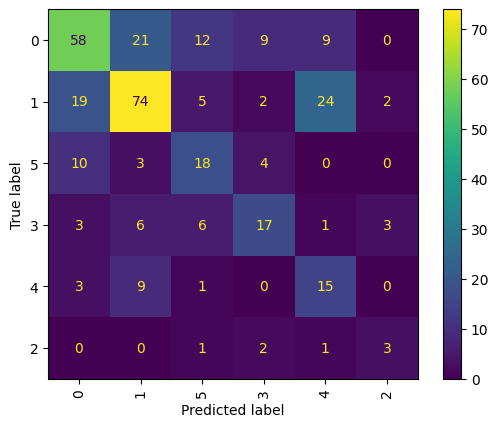

In [370]:
# Confusion Matrix of Keyword Approach:
plot_confusion_matrix(df_shuffled['labels_validation'], df_shuffled['predictions'], df_shuffled['labels_validation'].unique())